# 0. 기본 정보
* 코드 작성자: 여서연
* 코드 작성일: 2024-08-17

# 1. 기초 설정

## 사용 라이브러리

In [1]:
import sqlite3
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# 2. 데이터 확인

In [2]:
olist_db = "../data/olist_database.db"
conn = sqlite3.connect(olist_db)

In [3]:
cursor = conn.cursor()

In [4]:
query_products = "SELECT * FROM olist_products_dataset"
df_products = pd.read_sql_query(query_products, conn)
df_products

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,furniture_decor
32947,bf4538d88321d0fd4412a93c974510e6,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,construction_tools_lights
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,bed_bath_table
32949,83808703fc0706a22e264b9d75f04a2e,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories


# 3. 문제 정의

## 지역별 리뷰 평점

In [5]:
query = """
SELECT
    c.customer_state AS region,
    AVG(r.review_score) AS average_review_score
FROM
    olist_order_reviews_dataset r
JOIN
    olist_orders_dataset o ON r.order_id = o.order_id
JOIN
    olist_customers_dataset c ON o.customer_id = c.customer_id
GROUP BY
    c.customer_state
ORDER BY
    average_review_score DESC
"""

df_region_avg_scores = pd.read_sql_query(query, conn)
df_region_avg_scores

,region,average_review_score
0,AP,4.194030
1,AM,4.183673
2,PR,4.180032
3,SP,4.173951
4,MG,4.136172
5,RS,4.133321
6,MS,4.118785
7,RN,4.105809
8,MT,4.102990
9,TO,4.096774


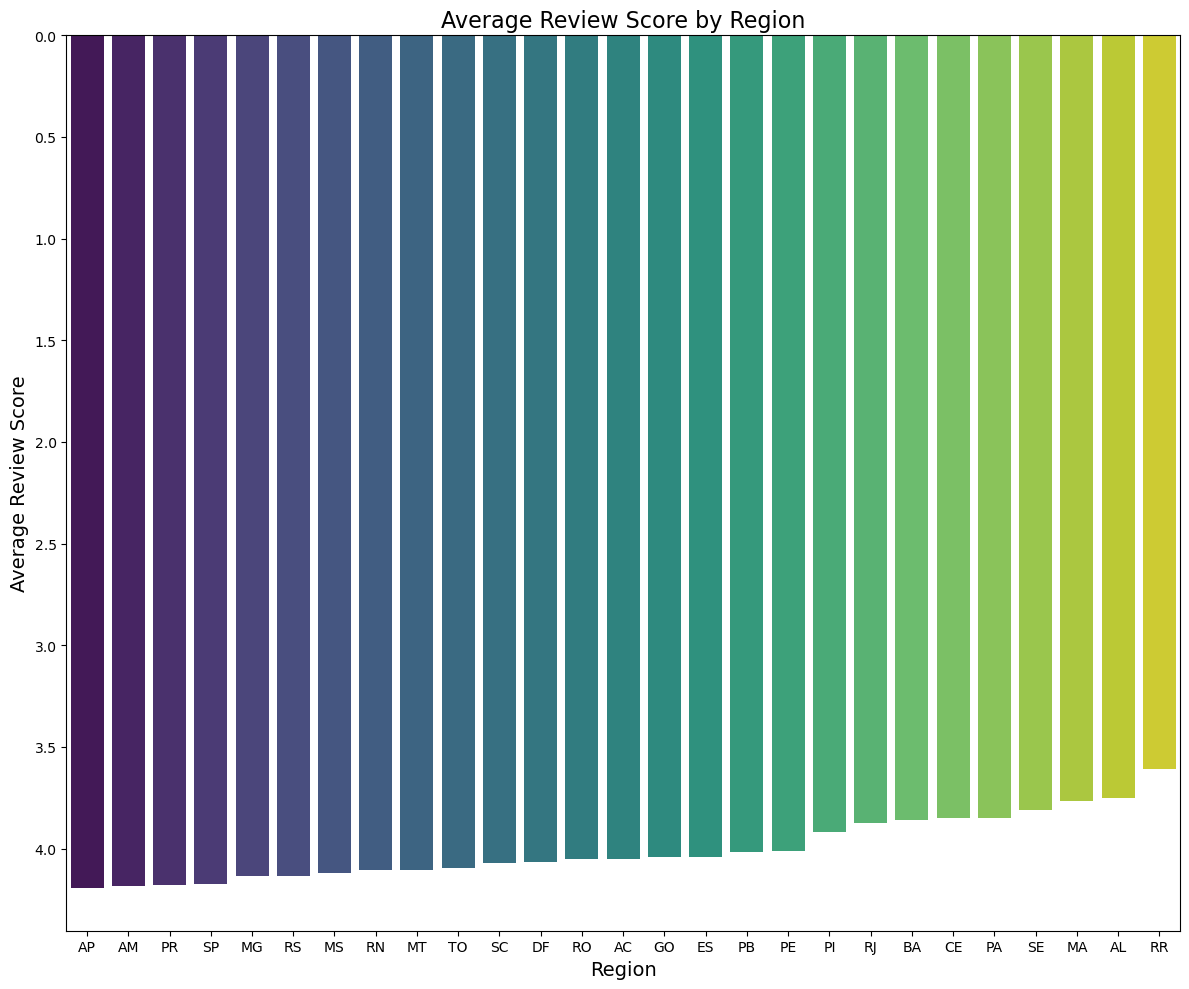

In [6]:
# 플롯 크기 설정
plt.figure(figsize=(12, 10))

# Barplot 생성
ax = sns.barplot(
    data=df_region_avg_scores,
    x="region",
    y="average_review_score",
    palette="viridis"
)

# 제목 및 레이블 설정
plt.title("Average Review Score by Region", fontsize=16)
plt.xlabel("Region", fontsize=14)
plt.ylabel("Average Review Score", fontsize=14)

# 그래프 출력
plt.tight_layout()
plt.gca().invert_yaxis()  # y축 역순 출력
plt.show()

## 카테고리별 리뷰 평점

In [7]:
query = """
SELECT
    p.product_category_name_english AS category,
    AVG(r.review_score) AS average_review_score
FROM
    olist_order_items_dataset i
JOIN
    olist_order_reviews_dataset r ON i.order_id = r.order_id
JOIN
    olist_products_dataset p ON i.product_id = p.product_id
GROUP BY
    p.product_category_name_english
ORDER BY
    average_review_score DESC
"""

df_category_avg_scores = pd.read_sql_query(query, conn)
df_category_avg_scores

,category,average_review_score
0,cds_dvds_musicals,4.642857
1,fashion_childrens_clothes,4.500000
2,books_general_interest,4.446266
3,costruction_tools_tools,4.444444
4,flowers,4.419355
...,...,...
67,fashion_male_clothing,3.641221
68,home_comfort_2,3.629630
69,office_furniture,3.493183
70,diapers_and_hygiene,3.256410


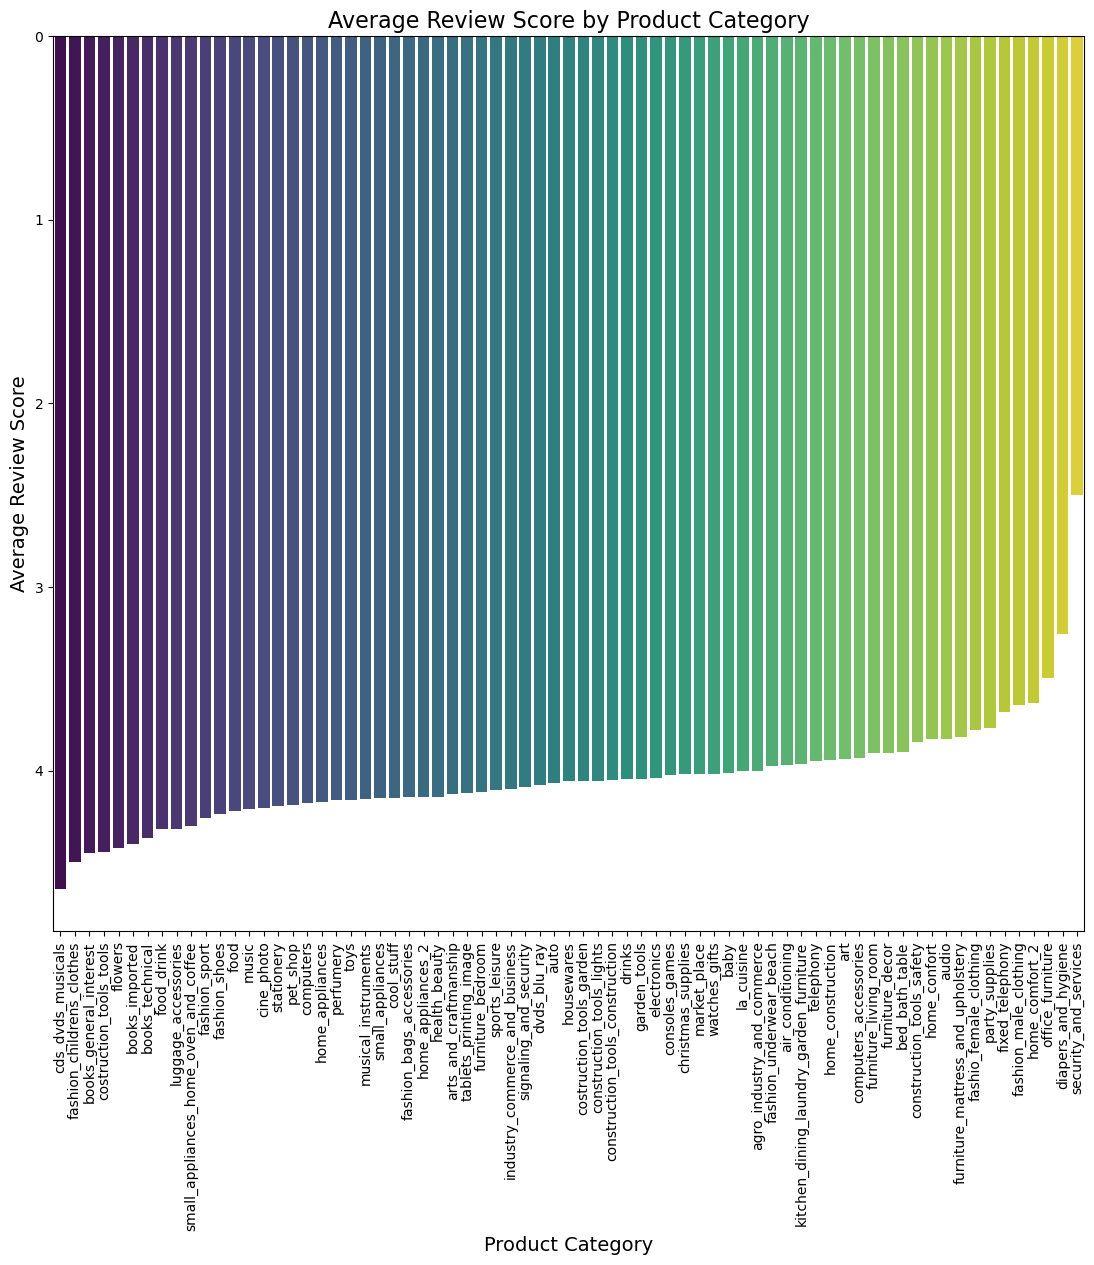

In [8]:
# 플롯 크기 설정
plt.figure(figsize=(12, 10))

# Barplot 생성
ax = sns.barplot(
    data=df_category_avg_scores,
    x="category",
    y="average_review_score",
    palette="viridis"
)

# 제목 및 레이블 설정
plt.title('Average Review Score by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Average Review Score', fontsize=14)

# 그래프 출력
plt.tight_layout()
plt.xticks(rotation=90)  # x축 레이블 90도 회전
plt.gca().invert_yaxis()  # y축 역순 출력
plt.show()

지역별 리뷰 평점에서는 서로 큰 차이가 없지만, 카테고리별 리뷰 평점에서는 상대적으로 차이가 큰 것을 알 수 있음

## 리뷰 평점을 분석하는 게 정말 유의미한가?

In [9]:
# 고객별 리뷰 평점 계산
query_avg_rating = """
SELECT
    c.customer_unique_id,
    COUNT(r.review_id) AS created_reviews,
    AVG(r.review_score) AS avg_review_score
FROM
    olist_order_reviews_dataset r
JOIN
    olist_orders_dataset o ON r.order_id = o.order_id
JOIN
    olist_customers_dataset c ON o.customer_id = c.customer_id
GROUP BY
    c.customer_unique_id
"""
df_avg_rating = pd.read_sql_query(query_avg_rating, conn)
df_avg_rating

,customer_unique_id,created_reviews,avg_review_score
0,0000366f3b9a7992bf8c76cfdf3221e2,1,5.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,4.0
2,0000f46a3911fa3c0805444483337064,1,3.0
3,0000f6ccb0745a6a4b88665a16c9f078,1,4.0
4,0004aac84e0df4da2b147fca70cf8255,1,5.0
...,...,...,...
95375,fffcf5a5ff07b0908bd4e2dbc735a684,1,5.0
95376,fffea47cd6d3cc0a88bd621562a9d061,1,4.0
95377,ffff371b4d645b6ecea244b27531430a,1,5.0
95378,ffff5962728ec6157033ef9805bacc48,1,5.0


In [10]:
df_avg_rating['created_reviews'].unique()

array([ 1,  2,  4,  3,  5,  6,  7,  9, 17], dtype=int64)

In [11]:
# 고객별 주문 횟수 계산
query_order_count = """
SELECT
    c.customer_unique_id,
    COUNT(o.order_id) AS order_count
FROM
    olist_orders_dataset o
JOIN
    olist_customers_dataset c ON o.customer_id = c.customer_id
GROUP BY
    c.customer_unique_id
"""
df_order_count = pd.read_sql_query(query_order_count, conn)
df_order_count

,customer_unique_id,order_count
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
96091,fffcf5a5ff07b0908bd4e2dbc735a684,1
96092,fffea47cd6d3cc0a88bd621562a9d061,1
96093,ffff371b4d645b6ecea244b27531430a,1
96094,ffff5962728ec6157033ef9805bacc48,1


In [12]:
df_order_count['order_count'].unique()

array([ 1,  2,  3,  4,  6,  7,  5,  9, 17], dtype=int64)

In [13]:
# 두 데이터를 결합
df_combined = pd.merge(df_avg_rating, df_order_count, on='customer_unique_id')

# 리뷰 평점과 재구매 횟수의 상관관계 계산
df_combined['avg_review_score'].corr(df_combined['order_count'])

0.006289168942284851

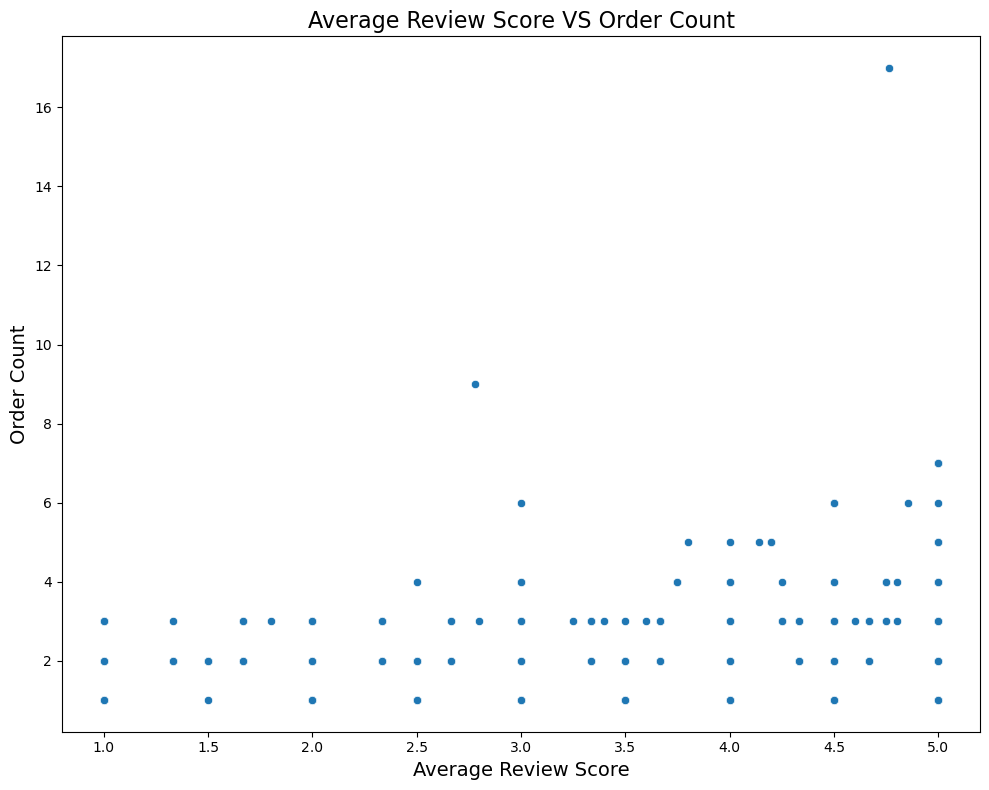

In [14]:
# 플롯 크기 설정
plt.figure(figsize=(10, 8))

# Barplot 생성
ax = sns.scatterplot(
    data=df_combined,
    x="avg_review_score",
    y="order_count"
)

# 제목 및 레이블 설정
plt.title('Average Review Score VS Order Count', fontsize=16)
plt.xlabel('Average Review Score', fontsize=14)
plt.ylabel('Order Count', fontsize=14)

# 그래프 출력
plt.tight_layout()
plt.show()

# 4. 문제 원인 분석

In [15]:
# 리뷰 평점이 낮은 카테고리의 리뷰 살펴보기
query = """
SELECT
    r.*
FROM
    olist_order_items_dataset i
JOIN
    olist_order_reviews_dataset r ON i.order_id = r.order_id
JOIN
    olist_products_dataset p ON i.product_id = p.product_id
WHERE
    p.product_category_name_english = 'security_and_services'
"""

df_lowest_category = pd.read_sql_query(query, conn)
df_lowest_category

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,1067a7f22781153115958799dc72a8df,bede3503afed051733eeb4a84d1adcc5,1,None,"boa tarde produto enviado errado, terei que me...",2017-09-29 00:00:00,2017-09-30 20:49:37
1,82ec4a1c6f0134f607033e23431ee298,2c4ada2e75c2ad41dd93cebb5df5f023,4,None,Envio muito rápido. Recomendo.,2017-02-15 00:00:00,2017-02-16 02:54:35


In [16]:
df_lowest_category['review_comment_message'][0]

'boa tarde produto enviado errado, terei que me deslocar aos correios pois moro em um condomínio tive receber, e ainda irei esperar chegar para so depois eu receber o produto correto, paguei via boleto'

# 버릴 코드

In [17]:
query_reviews = "SELECT * FROM olist_order_reviews_dataset"
df_reviews = pd.read_sql_query(query_reviews, conn)
df_reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,None,None,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,None,None,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,None,None,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,None,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,None,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,None,None,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,None,None,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,None,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,None,None,2018-07-01 00:00:00,2018-07-02 12:59:13


In [18]:
query_items = "SELECT * FROM olist_order_items_dataset"
df_items = pd.read_sql_query(query_items, conn)
df_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [19]:
query_products = "SELECT * FROM olist_products_dataset"
df_products = pd.read_sql_query(query_products, conn)
df_products

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,furniture_decor
32947,bf4538d88321d0fd4412a93c974510e6,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,construction_tools_lights
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,bed_bath_table
32949,83808703fc0706a22e264b9d75f04a2e,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories


## 리뷰를 가장 많이 작성한 고객

In [20]:
df_avg_rating[df_avg_rating['created_reviews']==17]

,customer_unique_id,created_reviews,avg_review_score
52592,8d50f5eadf50201ccdcedfb9e2ac8455,17,4.764706


In [21]:
query_most_reviews = """
SELECT
    r.*
FROM
    olist_order_reviews_dataset r
JOIN
    olist_orders_dataset o ON r.order_id = o.order_id
JOIN
    olist_customers_dataset c ON o.customer_id = c.customer_id
WHERE
    c.customer_unique_id = '8d50f5eadf50201ccdcedfb9e2ac8455'
ORDER BY
    r.review_answer_timestamp
"""
df_most_reviews = pd.read_sql_query(query_most_reviews, conn)
df_most_reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,a58d637619788f616ab837c119ca5b2c,5d848f3d93a493c1c8955e018240e7ca,5,None,None,2017-05-28 00:00:00,2017-05-29 00:05:02
1,7ecc7adba17766dab9097a0116a75a66,369634708db140c5d2c4e365882c443a,5,None,None,2017-06-25 00:00:00,2017-06-26 20:53:55
2,cb44e7ba6bacbf6f348aec2b9ab56790,4f62d593acae92cea3c5662c76122478,5,None,None,2017-07-22 00:00:00,2017-07-24 12:52:56
3,8858e37108a15029eef04f510161fb8a,bf92c69b7cc70f7fc2c37de43e366173,5,None,None,2017-08-01 00:00:00,2017-08-02 01:22:24
4,c40b5c0ee4779d9f1c25da03503943e1,519203404f6116d406a970763ee75799,5,None,None,2017-08-10 00:00:00,2017-08-11 03:39:10
5,fe4defbc0ab6116a1e5a93741fde4b1d,5837a2c844decae8a778657425f6d664,1,None,None,2017-08-19 00:00:00,2017-08-19 13:34:35
6,fa2449a730e7e4a66f698977f6ab3802,e3071b7624445af6e4f3a1b23718667d,5,None,None,2017-09-12 00:00:00,2017-09-13 01:39:44
7,2f195bb1c592abb49ca9930b8b6b22f9,cd4b336a02aacabd0ef22f6db711f95e,5,None,None,2017-10-24 00:00:00,2017-10-24 16:55:12
8,ceea1f7a0d8f9c6d139da6813f09344f,89d9b111d2b990deb5f5f9769f92800b,5,None,None,2017-11-01 00:00:00,2017-11-02 01:42:01
9,68faf98deb4bc8c25eb42f07a1216f46,b850a16d8faf65a74c51287ef34379ce,5,None,None,2017-11-28 00:00:00,2017-11-28 21:59:16


In [22]:
# 그 고객의 1점 리뷰
query = """
SELECT
    *
FROM
    olist_order_reviews_dataset r
JOIN
    olist_orders_dataset o ON r.order_id = o.order_id
JOIN
    olist_customers_dataset c ON o.customer_id = c.customer_id
WHERE
    r.review_id = 'fe4defbc0ab6116a1e5a93741fde4b1d'
"""

df = pd.read_sql_query(query, conn)
df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,fe4defbc0ab6116a1e5a93741fde4b1d,5837a2c844decae8a778657425f6d664,1,None,None,2017-08-19 00:00:00,2017-08-19 13:34:35,5837a2c844decae8a778657425f6d664,31dd055624c66f291578297a551a6cdf,unavailable,2017-07-17 22:11:13,2017-07-17 22:23:46,None,None,2017-08-17 00:00:00,31dd055624c66f291578297a551a6cdf,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP


In [23]:
# 그 리뷰의 제품
query = """
SELECT
    *
FROM
    olist_order_items_dataset i
JOIN
    olist_products_dataset p ON i.product_id = p.product_id
WHERE
    i.order_id = '5837a2c844decae8a778657425f6d664'
"""

df = pd.read_sql_query(query, conn)
df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
